pip install -r requirements.txt

# Bivariate analyses

In [ ]:
penguins = sns.load_dataset("penguins")

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Hypothesis: The mean of body mass of the population of penguins is 4000 gr 

In [ ]:
mean_mass_samp = penguins['body_mass_g'].mean()
mean_mass_samp

4201.754385964912

Is this meaningfully different from our hypothesis?

With <strong> bootstrapping </strong> we build up a theoritical population based on our sample, the dataset. It should be similar to that of the population: 

![](https://miro.medium.com/max/1400/1*1DT-TXVpxwCQa5kUxzt5AA.png)

In [ ]:
#step 3 create a bootstrap distribution
so_boot_distn=[]
for i in range(5000):
    so_boot_distn.append(
    # step 2 calculate point estimate
    np.mean (
    #step 1 resample
    penguins.sample(frac=.2, replace=True)['body_mass_g']
    )
)

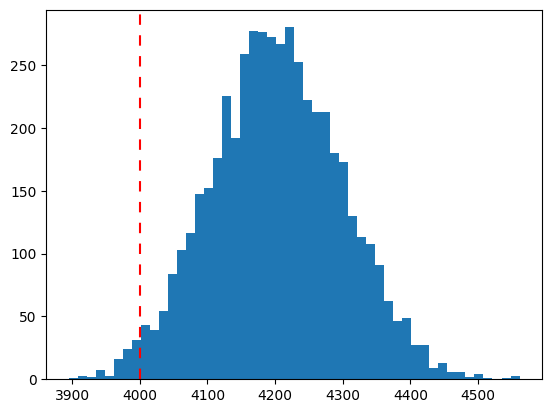

In [ ]:
plt.hist(so_boot_distn, bins=50);
plt.axvline(x=4000, c='red',linestyle=(0, (5, 5)))
plt.show()




The 4000 gr is on the left of the distribution. </br>
The standard error is the standard deviation of the bootstrap distribution.

# Statistical hypothesis

<strong> Hypothese testing</strong> is a structured procedure to investigate our ideas about the world (in DS about the data). 
<strong> Hypothesis</strong> is a statement about an unknown population parameter. We don't know the true value of this population parameter and can only make inferences about it from our data. 
Hypothese test is a test of two compoting hypothesis:
- H0: null hypothesis, the existing idea (often reason from it is not the case or no significant effect)
- Ha/H1: alternative hypothesis, the new idea of the researcher

In a procedure at court there are two possible true statements:
- The defendant did not commited the crime (H0: not guilty)
- The defendant committed the crime (H1: guilty)

<strong>P-value</strong>: the probability of obtaining the result, always about the idea that the null hypothesis is true. It measures the strength of support for the H0 or in other words it measures the probability of obtaing a result, assuming the null hypothesis is true. 

<strong>Significance level (α)</strong>: if the p-value is under this significance level you reject your H0 (p-value ≤ α)
<br>
If H0 includes:
- not different from (=) -> Ha/H1 is different from (≠)
- greater than or equal (≥) -> Ha/H1 is less than (<)
- less than or equal (≤) -> Ha/H1 is greater than (>)

If the Ha/H1 includes:
- different from (≠): two tailed test => t.cdf or norm.cdf AND 1-t.cdf or 1-norm.cdf
- greater than (>): right tailed test => 1-t.cdf or 1-norm.cdf
- less than (<): left tailed test => t.cdf or norm.cdf

<img src="left_right_two_tailed.png">


## Hypothesis 1: one sample statistic

If you received from <i>previous research</i> that the average weight of penguins is 4000 gr. Then rises the question if our sample provides evidence that the average weight of the population is greater than 4000 gr. <br>

Hypothese for the penguin dataset with (α =0.05)
- H0: The mean of body mass of the population of all penguins<strong> is less than or equal to</strong>  4000 gr (μ ≤ 4000.0)
- Ha/H1: The mean of body mass of the population of all penguins <strong> greater than </strong> 4000 gr (μ > 4000.0)

First we need to determine from the information what kind of statistics we will use:

![](https://www.statology.org/wp-content/uploads/2021/08/zscore_vs_tscore1.png)

In [ ]:
std_error = np.std(so_boot_distn, ddof=1)

Before we can test the hypothesis we need to standardize the values. We do this by using the z-score. </br>

The z-score is a standardized measure of the difference between the sample statistic and the hypothesized statistic. It tells us how many standard deviations a value is away from the mean (hypothesis mean).


In [ ]:
mean_mass_hyp = 4000
mean_mass_samp = penguins.body_mass_g.mean() #4201...
z_score = (mean_mass_samp- mean_mass_hyp)/ std_error

In [ ]:
mean_mass_hyp

4000

In [ ]:
mean_mass_samp

4201.754385964912

In [ ]:
z_score

2.0911015692302866

The cumulative distribution function (cdf) gives the probability that the random variable X is less than or equal to x.
Using the z-score as the x-value in the CDF allows us to work with a standardized normal distribution, which is useful for comparing values from different normal distributions.

In [ ]:
from scipy.stats import norm
p_value = 1-norm.cdf(z_score)
# Print the p_value
print('The p-value is: {}'.format(p_value))

The p-value is: 0.01825948004141642


In [ ]:
alpha=0.05
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

Reject Null Hypothesis


<strong> Conclusion: </strong> we reject the H0 because the p-value is lower than 0.05 </br>
The sample provides enough evidence that the mean is higher then 4000 gr.

## Hypothesis 2: two sample statistic

Another hypothesis on the penguin dataset (α =0.05):
- H0: The mean of body mass of male penguins is <strong> greater than or equal to </strong>  than that of female penguins (μ_male ≥  μ_female)
- Ha/H1: The mean of body mass of  male penguins is <strong> less </strong>  than that of female penguins (μf < μm)

<strong> Degrees of freedom: </strong> are defined as the maximum number of logically independent values in the data sample. If you know the average of 5 differten numbers then I only need 4 of them to find out what number 5 is. 

![](https://vitalflux.com/wp-content/uploads/2022/01/Difference-between-means-of-two-populations.jpg)

In [ ]:
#create variables for mean, standard error and number
#the mean per category
m_male = np.mean(penguins[penguins['sex']== 'Male']['body_mass_g'])
m_female = np.mean(penguins[penguins['sex']== 'Female']['body_mass_g'])
#the standard error per category
s_male = np.std(penguins[penguins['sex']== 'Male']['body_mass_g'], ddof=1)
s_female = np.std(penguins[penguins['sex']== 'Female']['body_mass_g'], ddof=1)
#the sample size per category
n_female = len(penguins[penguins['sex']== 'Female']['body_mass_g'])
n_male = len(penguins[penguins['sex']== 'Male']['body_mass_g'])

In [ ]:
nominator= m_male-m_female
denominator=np.sqrt(s_male**2/n_male +s_female**2/n_female)
#t-test calculation
t_stat=nominator/denominator
print(t_stat)

8.554537231165762


In [ ]:
from scipy.stats import t
# Calculate the degrees of freedom
degrees_of_freedom = len(penguins['sex'])-2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print('The p-value is: {}'.format(p_value))

The p-value is: 0.9999999999999998


<strong> Conclusion: </strong> We keep the H0 since the p-value is higher 0.05.

In [ ]:
sns.barplot(x=penguins['sex'], y= penguins['body_mass_g'])

Simpler method is by using a package:

In [ ]:
# INSTALL pingouin first on workspace remove #:
!pip install pingouin 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.1 MB/s eta 0:00:00
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=594806300bf2fea7ee7180ba5370f1c163c2d3bfe99066f284c0ccc61dde4131
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.5
    Not uninstalling pandas at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'pandas'. No files were found to uninstall.



In [ ]:
import pingouin as pg
#in this test attach to parameter x a list of all the values of one category (male) 
# and insert in y a list of all the values of the other category
test_results = pg.ttest(x=penguins[penguins['sex']== 'Male']['body_mass_g'], 
                        y=penguins[penguins['sex']== 'Female']['body_mass_g'], alternative='less')
print(test_results)

               T         dof alternative  p-val           CI95%   cohen-d  \
T-test  8.554537  323.895881        less    1.0  [-inf, 815.19]  0.936205   

             BF10         power  
T-test  4.379e-14  6.611908e-18  


## Hypothesis 3: ANOVA

- H0: The mean of body mass for each specie is  <strong> equal (no difference)</strong> to the other species (μ_adelie =  μ_chinstrap = μ_gentoo)
- Ha/H1: The mean of body mass for each specie is  <strong> not equal (difference)</strong> to the other species (μ_adelie ≠  μ_chinstrap ≠ μ_gentoo)

In [ ]:
anova_results = pg.anova(data=penguins, dv='body_mass_g', between='species')
print(anova_results)

    Source  ddof1  ddof2           F         p-unc       np2
0  species      2    339  343.626275  2.892368e-82  0.669672


<strong> Conclusion: </strong>We reject the H0 since the p-value is lower 0.05.

In [ ]:
sns.barplot(data=penguins, y='body_mass_g', x='species', hue='species')

<AxesSubplot: xlabel='species', ylabel='body_mass_g'>

Other statistical methods:
 - Pearson correlation
 - one-sample t-test
 - Chi-squared test
 - Paired t-test
 - Linear regression

![](https://cdn.scribbr.com/wp-content/uploads/2021/01/type-i-and-ii-error-2.png)

# Machine Learning Hypothesis

Also for algorithms or models does hypothesiss consist. It is used in supervised learning to find the function that best maps input to output. <br>
The <strong> hypothesis </strong>can be a single model that maps features to the target, however, may be the result/metrics. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=396e6a71-39e4-4b31-b756-ce7324373cd4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>